This notebook looks at the summary data and plots some distributions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

import os
import pickle
import pandas as pd
from matplotlib.lines import Line2D

In [2]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-4
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True
for key in rcparams: mpl.rcParams[key] = rcparams[key]

Read in summary data for one halo to check the format etc.

In [3]:
foldername = '../data/tng_lowres_2d_summary/'
#foldername = '../data/tng_2d_summary/'

In [4]:
haloIDs = []
for f in [f for f in os.listdir(foldername)]:
    haloIDs.append( int(f.split('_')[1]) )

In [5]:
for f in [f for f in os.listdir(foldername)][0:1]:
    haloId = f.split('_')[1]
    print(haloId)
    data = np.load('%s/%s' % (foldername, f))

245252


In [6]:
data.keys()

dict_keys(['catsh_id', 'aper_x0', 'aper_y0', 'aper_ba', 'aper_pa', 'aper_rkpc', 'aper_logms', 'rpix_shape', 'mu_shape', 'mu_err_shape', 'e_shape', 'e_err_shape', 'pa_shape', 'pa_err_shape', 'maper_shape', 'rpix_prof', 'mu_prof', 'mu_err_prof', 'maper_prof', 'output_shape', 'output_prof'])

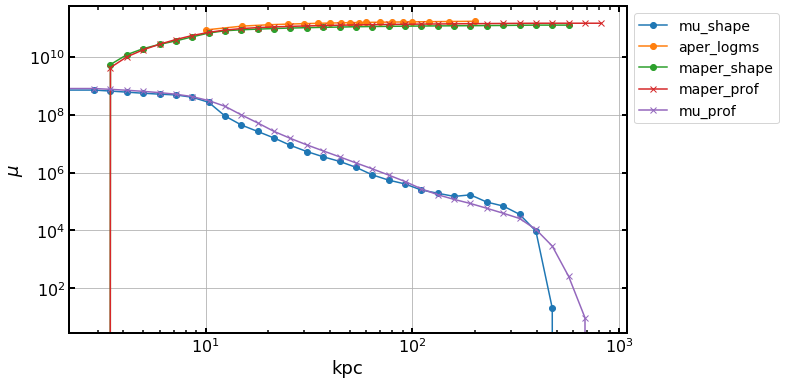

In [7]:
plt.plot(data['rpix_shape'] * 5.333, data['mu_shape'], 'o-', label='mu_shape')
plt.plot(data['aper_rkpc'], 10 ** data['aper_logms'], 'o-', label='aper_logms')
plt.plot(data['rpix_shape'] * 5.333, data['maper_shape'], 'o-', label='maper_shape')
plt.plot(data['rpix_prof'] * 5.333, data['maper_prof'], 'x-', label='maper_prof')
plt.plot(data['rpix_prof'] * 5.333, data['mu_prof'], 'x-', label='mu_prof')

plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('kpc')
plt.ylabel(r'$\mu$')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

Okay good that mass profiles are matching up. Now plot mass profile for all the halos.

/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


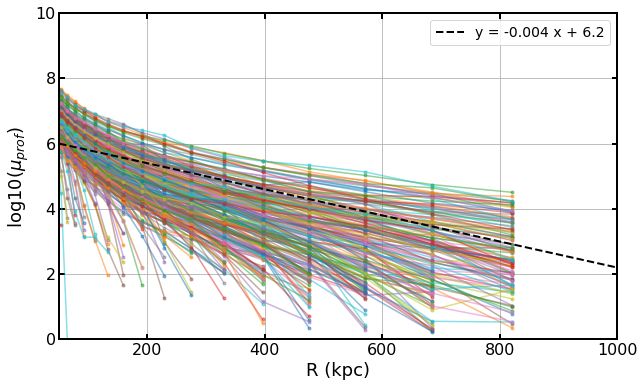

In [8]:
plt.clf()
for i, haloId in enumerate(haloIDs):
    f = [f for f in os.listdir(foldername) if f.__contains__('_%s_'%haloId)]
    if len(f) != 1:
        print(f, haloId)
        break
    else:
        f = f[0]
    data = np.load('%s/%s' % (foldername, f))
    plt.plot(( data['rpix_prof'] * 5.333), np.log10(data['mu_prof']), '.-', alpha=0.5)
# plot the (estimated) line from Felipe's paper
x1, y1, x2, y2 = 50, 6, 800, 3
m = ( y1 - y2 ) / ( x1 - x2 )
r = np.array( [50, 1000] )
plt.plot(r, m * ( r - x1) + y1, 'k--', lw=2, label='y = %s x + %s' % (m, -m * x1 + y1))
#
plt.xlabel('R (kpc)' )
plt.ylabel(r'log10($\mu_{prof}$) ')
plt.xlim(50, 1000)
plt.ylim(0, 10)
plt.legend()
plt.show()

Now color-code by shape

In [9]:
data_dir = '../outputs/tng-100/'

file = [ f for f in os.listdir(data_dir) if f.startswith('shape100_')][0]
with open('%s/%s' % (data_dir, file), 'rb') as f:
    shape100 = pickle.load(f)

In [10]:
# combine spherical and triaxials
print( np.unique(shape100['shape']) )
shape100['shape'][ shape100['shape'] == 'S' ] = 'T'
print( np.unique(shape100['shape']) )

['O' 'P' 'S' 'T']
['O' 'P' 'T']


/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


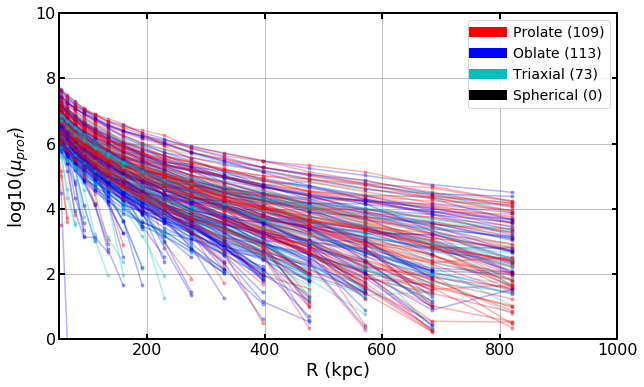

In [11]:
colors = {'P': 'r', 'O': 'b', 'S': 'k', 'T': 'c'}
counter_p, counter_o, counter_s, counter_t = 0, 0, 0, 0

plt.clf()
for i, haloId in enumerate(haloIDs):
    f = [f for f in os.listdir(foldername) if f.__contains__('_%s_'%haloId)]
    if len(f) != 1:
        print(f, haloId)
        break
    else:
        f = f[0]
    data = np.load('%s/%s' % (foldername, f))
    
    ind = np.where(np.array( shape100['haloId'] ) == haloId)[0]
    shape_class = np.array(shape100['shape'])[ind][0]
    if shape_class == 'P': counter_p += 1
    if shape_class == 'O': counter_o += 1
    if shape_class == 'S': counter_s += 1
    if shape_class == 'T': counter_t += 1    
    
    plt.plot(( data['rpix_prof'] * 5.333), np.log10(data['mu_prof']), '.-', alpha=0.3, color=colors[shape_class])
    
plt.xlabel('R (kpc)' )
plt.ylabel(r'log10($\mu_{prof}$) ')
plt.xlim(50, 1000)
plt.ylim(0, 10)

# add legend
custom_lines = [Line2D([0], [0], color=colors['P'], lw=10),
                Line2D([0], [0], color=colors['O'], lw=10),
                Line2D([0], [0], color=colors['T'], lw=10),
                Line2D([0], [0], color=colors['S'], lw=10)]
plt.legend(custom_lines,
               ['Prolate (%s)' % counter_p,
                'Oblate (%s)' % counter_o,
                'Triaxial (%s)' % counter_t,
                'Spherical (%s)' % counter_s],
               bbox_to_anchor=(1, 1), frameon=True)

plt.show()

Bin the galaxies wrt M100 and then plot the above figure for each bin.

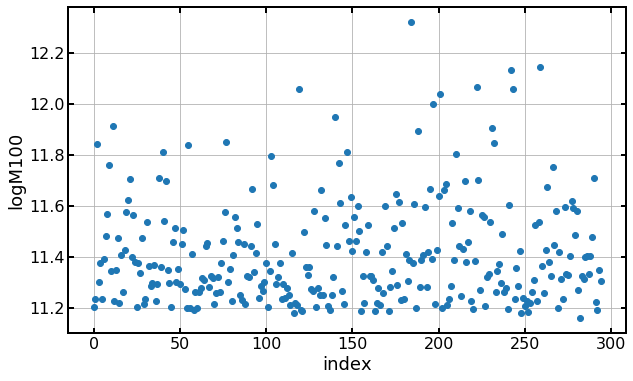

In [12]:
# first get all the M100s
logm100s = []
for i, haloId in enumerate(haloIDs):
    f = [f for f in os.listdir(foldername) if f.__contains__('_%s_'%haloId)]
    if len(f) != 1:
        print(f, haloId)
        break
    else:
        f = f[0]
    data = np.load('%s/%s' % (foldername, f))
    
    ind = np.where( data['aper_rkpc'] == 100 )[0]
    m100 = data['aper_logms'][ind]
    logm100s.append(m100)
    
# lets plot the distribution of the logm100 vals; just to check
plt.plot(logm100s, 'o')
plt.ylabel('logM100')
plt.xlabel('index')
plt.show()

/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log10
/Users/humnaawan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in log10


<Figure size 720x432 with 0 Axes>

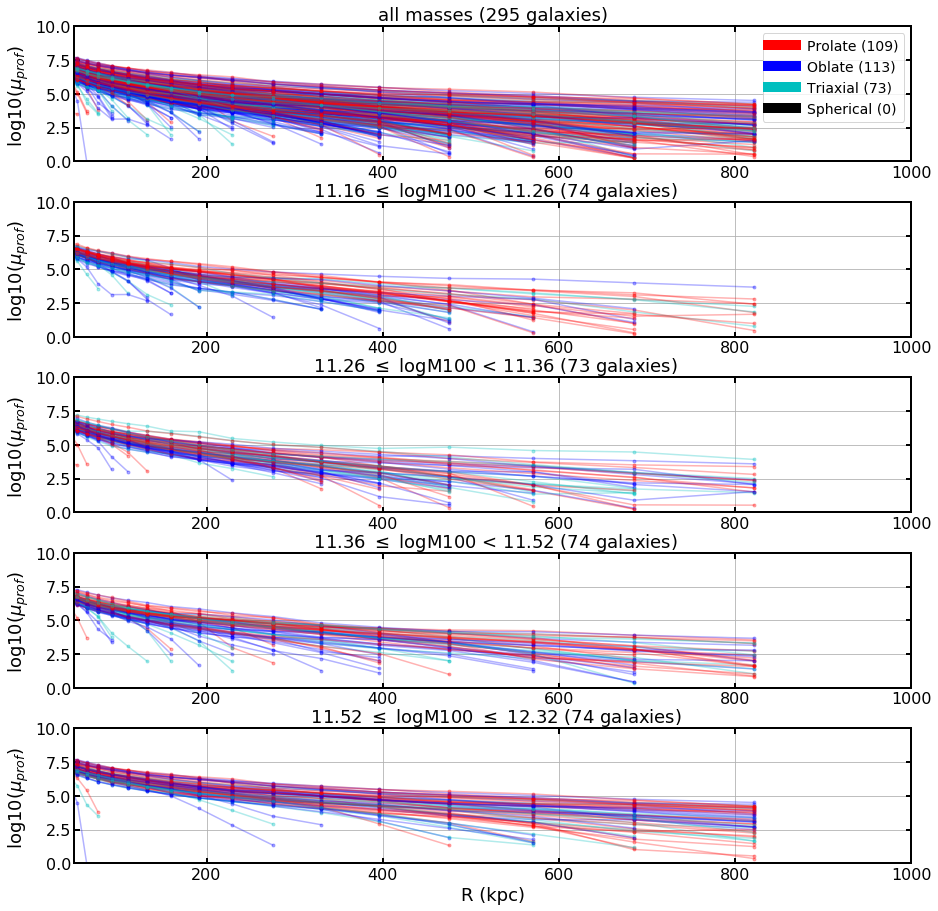

In [13]:
# now redo the plot above + include subplots for various quartiles in logM100
colors = {'P': 'r', 'O': 'b', 'S': 'k', 'T': 'c'}
counter_p, counter_o, counter_s, counter_t = 0, 0, 0, 0

plt.clf()
plt.clf()
nrows, ncols = 5, 1
fig, axes = plt.subplots(nrows, ncols)
plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9)
    
counter_1, counter_2, counter_3, counter_4 = 0, 0, 0, 0
for i, haloId in enumerate(haloIDs):
    f = [f for f in os.listdir(foldername) if f.__contains__('_%s_'%haloId)]
    if len(f) != 1:
        print(f, haloId)
        break
    else:
        f = f[0]
    data = np.load('%s/%s' % (foldername, f))
    
    ind = np.where(np.array( shape100['haloId'] ) == haloId)[0]
    shape_class = np.array(shape100['shape'])[ind][0]
    if shape_class == 'P': counter_p += 1
    if shape_class == 'O': counter_o += 1
    if shape_class == 'S': counter_s += 1
    if shape_class == 'T': counter_t += 1    
    
    
    # all
    axes[0].plot(( data['rpix_prof'] * 5.333), np.log10(data['mu_prof']), '.-', alpha=0.3, color=colors[shape_class])
    
    # now determine where the logM100 of this galaxies lies in the overall distribution.
    ind = np.where( data['aper_rkpc'] == 100 )[0]
    logm100 = data['aper_logms'][ind]
    
    q1, q2 = 0, 0.25
    if ( logm100 >= np.quantile(logm100s, q1)) and ( logm100 < np.quantile(logm100s, q2) ):
        axis_ind = 1
        counter_1 += 1
    q1, q2 = 0.25, 0.5
    if ( logm100 >= np.quantile(logm100s, q1)) and ( logm100 < np.quantile(logm100s, q2) ):
        axis_ind = 2
        counter_2 += 1
    q1, q2 = 0.5, 0.75
    if ( logm100 >= np.quantile(logm100s, q1)) and ( logm100 < np.quantile(logm100s, q2) ):
        axis_ind = 3
        counter_3 += 1
    q1, q2 = 0.75, 1.0
    if ( logm100 >= np.quantile(logm100s, q1)) and ( logm100 <= np.quantile(logm100s, q2) ):
        axis_ind = 4
        counter_4 += 1
    
    # now plot
    axes[axis_ind].plot(( data['rpix_prof'] * 5.333), np.log10(data['mu_prof']), '.-', alpha=0.3, color=colors[shape_class])
# plot details
fig.set_size_inches(15, 15)
axes[4].set_xlabel('R (kpc)' )
for row in range( nrows ):
    axes[row].set_ylabel(r'log10($\mu_{prof}$) ')
    axes[row].set_xlim(50, 1000)
    axes[row].set_ylim(0, 10)
# titles      
axes[0].set_title('all masses (%s galaxies)' % ( counter_1 + counter_2 + counter_3 + counter_4))
q1, q2 = 0, 0.25
axes[1].set_title(r' %.2f $\leq$ logM100 < %.2f (%s galaxies)' % (np.quantile(logm100s, q1),
                                                                  np.quantile(logm100s, q2),
                                                                  counter_1))
q1, q2 = 0.25, 0.5
axes[2].set_title(r' %.2f $\leq$ logM100 < %.2f (%s galaxies)' % (np.quantile(logm100s, q1),
                                                                  np.quantile(logm100s, q2),
                                                                  counter_2))
q1, q2 = 0.5, 0.75
axes[3].set_title(r' %.2f $\leq$ logM100 < %.2f (%s galaxies)' % (np.quantile(logm100s, q1),
                                                                  np.quantile(logm100s, q2),
                                                                  counter_3))
q1, q2 = 0.75, 1.0
axes[4].set_title(r' %.2f $\leq$ logM100 $\leq$ %.2f (%s galaxies)' % (np.quantile(logm100s, q1),
                                                                  np.quantile(logm100s, q2),
                                                                  counter_4))

# add legend
custom_lines = [Line2D([0], [0], color=colors['P'], lw=10),
                Line2D([0], [0], color=colors['O'], lw=10),
                Line2D([0], [0], color=colors['T'], lw=10),
                Line2D([0], [0], color=colors['S'], lw=10)]
axes[0].legend(custom_lines,
               ['Prolate (%s)' % counter_p,
                'Oblate (%s)' % counter_o,
                'Triaxial (%s)' % counter_t,
                'Spherical (%s)' % counter_s],
               bbox_to_anchor=(1, 1), frameon=True)

plt.show()

Lets plot some other things.

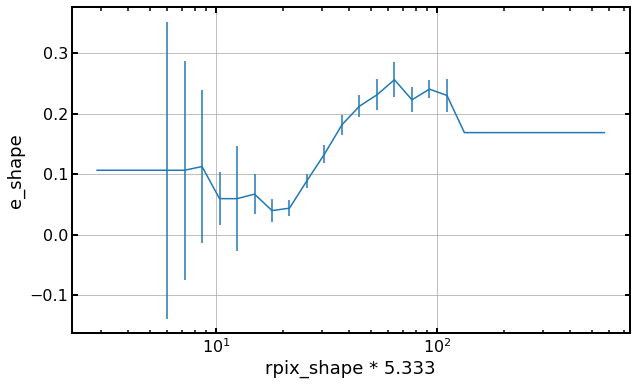

In [14]:
plt.errorbar(data['rpix_shape'] * 5.333, data['e_shape'], yerr=data['e_err_shape'])
plt.xlabel('rpix_shape * 5.333')
plt.ylabel('e_shape')
plt.gca().set_xscale('log')

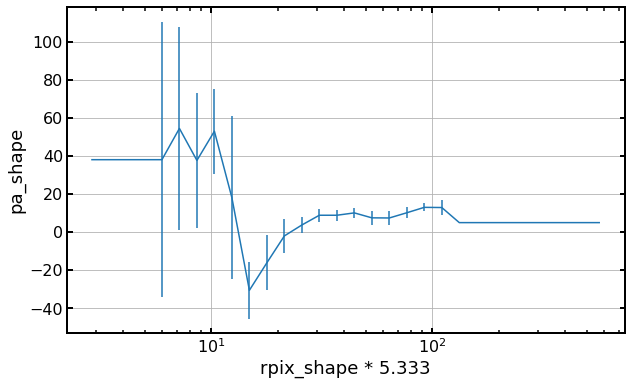

In [15]:
plt.errorbar(data['rpix_shape'] * 5.333, data['pa_shape'], yerr=data['pa_err_shape'])
plt.xlabel('rpix_shape * 5.333')
plt.ylabel('pa_shape')
plt.gca().set_xscale('log')

Recreate Fig 3 (top panel) in Hongyu's paper

In [16]:
np.unique( shape100['shape'] )

array(['O', 'P', 'T'], dtype='<U1')

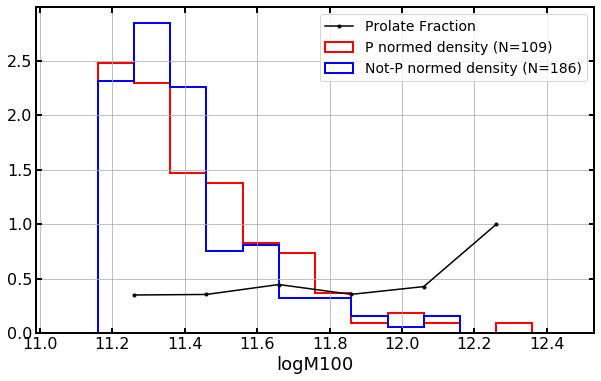

In [18]:
m_arr = np.arange(min(logm100s)-0.1, max(logm100s)+0.2, 0.1)
logm100s = np.array(logm100s).flatten() 
# plot normed densities
ind1 = np.where( shape100['shape'] == 'P')[0]
plt.hist( logm100s[ind1], histtype='step', lw=2, bins=m_arr, color='r',
         label='P normed density (N=%s)' % len(ind1), density=True )
ind2 = np.where( shape100['shape'] != 'P')[0]
plt.hist( logm100s[ind2], histtype='step', bins=m_arr, color='b',
         lw=2, label='Not-P normed density (N=%s)' % len(ind2), density=True )
# plot fraction
frac = []
ms = []
m_arr = np.arange(min(logm100s), max(logm100s)+0.2, 0.2)
for i in range(len(m_arr) - 1):
    mlow, mupp = m_arr[i], m_arr[i+1]
    ind = np.where( ( logm100s >= mlow ) & ( logm100s < mupp ))[0]
    frac.append( len( set(ind1) & set(ind) ) / len( ind) )
    ms.append( np.median( [mlow, mupp ]) )
plt.plot(ms, frac, 'k.-', label='Prolate Fraction')
# details        
plt.legend()
plt.xlabel( 'logM100' )
plt.show()